In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from classy import text

Version:  0.0.15


## Language Classifier

In [3]:
count,feature_names=text.count_letters('data/languages/E3.txt')
print((count,feature_names))


[[1951  344  548 1083 2901  534  515 1590 1510   43  204  898  533 1574
  1825  394   23 1359 1564 2192  602  194  552   28  425    8]] ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [4]:
count,feature_names=text.count_letters('data/languages/E3.txt')
print((count,feature_names))
p=text.letter_freq('English',feature_names)
print(p)

[[1951  344  548 1083 2901  534  515 1590 1510   43  204  898  533 1574
  1825  394   23 1359 1564 2192  602  194  552   28  425    8]] ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
[0.08167081670816709, 0.014920149201492016, 0.027820278202782035, 0.04253042530425305, 0.12702127021270215, 0.022280222802228026, 0.020150201502015026, 0.060940609406094075, 0.06966069660696608, 0.0015300153001530016, 0.00772007720077201, 0.04025040250402505, 0.02406024060240603, 0.06749067490674908, 0.07507075070750709, 0.019290192901929026, 0.0009500095000950011, 0.05987059870598707, 0.06327063270632707, 0.0905609056090561, 0.02758027580275803, 0.009780097800978013, 0.023600236002360026, 0.0015000150001500017, 0.019740197401974025, 0.0007400074000740008]


In [5]:
print((sum(count*log10(p))))

-29308.8749209


In [6]:
C=text.LanguageFileClassifier()

In [7]:
result=C.loglikelihood('data/languages/E*.txt',verbose=True)

data/languages/E.txt
	English: -66940.698183
	French: -66658.830412
	German: -67981.153163
	Spanish: -inf
	Esperanto: -inf
	Italian: -inf
	Turkish: -inf
	Swedish: -64389.950395
data/languages/E2.txt
	English: -675742.300297
	French: -726128.274875
	German: -709981.414175
	Spanish: -inf
	Esperanto: -inf
	Italian: -inf
	Turkish: -inf
	Swedish: -718253.874748
data/languages/E3.txt
	English: -29308.874921
	French: -31714.205599
	German: -30719.093076
	Spanish: -inf
	Esperanto: -inf
	Italian: -inf
	Turkish: -inf
	Swedish: -31106.553858


In [8]:
C.predict('data/languages/E*',verbose=True)

data/languages/E.txt
	English: -66940.698183
	French: -66658.830412
	German: -67981.153163
	Spanish: -inf
	Esperanto: -inf
	Italian: -inf
	Turkish: -inf
	Swedish: -64389.950395
data/languages/E2.txt
	English: -675742.300297
	French: -726128.274875
	German: -709981.414175
	Spanish: -inf
	Esperanto: -inf
	Italian: -inf
	Turkish: -inf
	Swedish: -718253.874748
data/languages/E3.txt
	English: -29308.874921
	French: -31714.205599
	German: -30719.093076
	Spanish: -inf
	Esperanto: -inf
	Italian: -inf
	Turkish: -inf
	Swedish: -31106.553858


array([7, 0, 0])

In [9]:
[C.target_names[i] for i in C.predict('data/languages/E*')]

['Swedish', 'English', 'English']

## Text Classification from Folders

In [10]:
from classy import text

In [11]:
train=text.load_files('data/films/train',verbose=True)
test=text.load_files('data/films/test',verbose=True)

11  filenames
['Comedy', 'Family', 'Thriller']  target names
5  filenames
['Comedy', 'Family', 'Thriller']  target names


In [12]:
train,test=text.text_to_vectors('data/films/train','data/films/test',verbose=True)

11  filenames
['Comedy', 'Family', 'Thriller']  target names
5  filenames
['Comedy', 'Family', 'Thriller']  target names


In [13]:
train.vectors

<11x581 sparse matrix of type '<class 'numpy.float64'>'
	with 813 stored elements in Compressed Sparse Row format>

In [14]:
v=array(train.vectors[0,:].todense()).ravel()

In [8]:
v.max()

0.48642658794195082

In [9]:
v.shape

(581,)

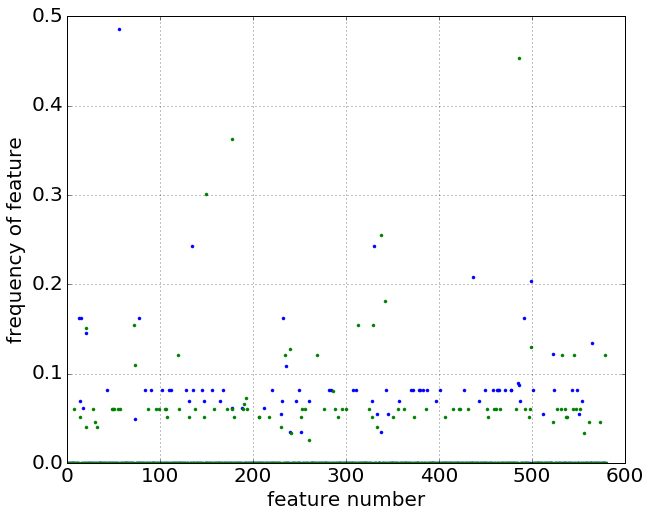

In [13]:
v=array(train.vectors[0,:].todense()).ravel()
plot(v,'.')
v=array(train.vectors[10,:].todense()).ravel()
plot(v,'.')
xlabel('feature number')
ylabel('frequency of feature')

In [14]:
train.vectors.shape

(11, 581)

In [15]:
C=text.Multinomial()

In [16]:
C.fit(train.vectors,train.targets)

Multinomial()

In [17]:
C.predict(test.vectors)

array([1, 0, 2, 0, 0])

In [18]:
C.percent_correct(test.vectors,test.targets)

20.0

## Footnote

In [19]:
from classy import *

In [20]:
train_files=text.load_files('data/films/train',verbose=True)
test_files=text.load_files('data/films/test',verbose=True)

11  filenames
['Comedy', 'Family', 'Thriller']  target names
5  filenames
['Comedy', 'Family', 'Thriller']  target names


In [21]:
train_data,test_data=text.text_to_vectors(train_files,test_files,verbose=True)

In [22]:
train_data.vectors

<11x581 sparse matrix of type '<class 'numpy.float64'>'
	with 813 stored elements in Compressed Sparse Row format>

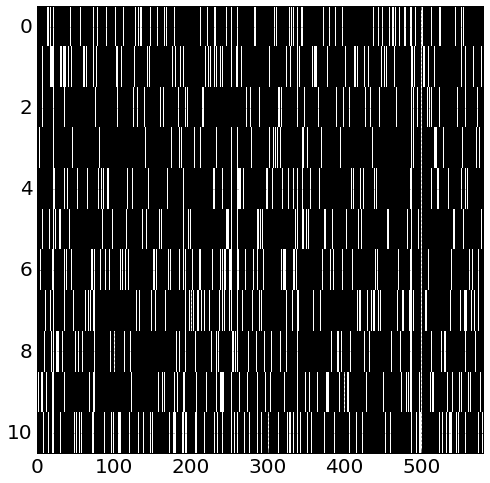

In [23]:
vectors_to_image(train_data.vectors,binary=True)

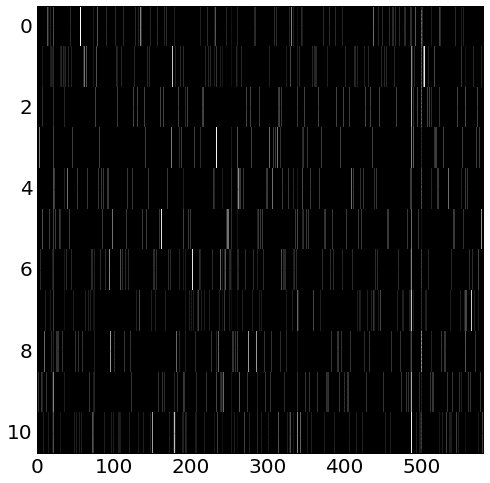

In [24]:
vectors_to_image(train_data.vectors,binary=False)

## Bigrams/Trigrams

In [25]:
from classy import text

In [26]:
train_files=text.load_files('data/films/train',verbose=True)
test_files=text.load_files('data/films/test',verbose=True)

11  filenames
['Comedy', 'Family', 'Thriller']  target names
5  filenames
['Comedy', 'Family', 'Thriller']  target names


In [27]:
train_data,test_data=text.text_to_vectors(train_files,test_files,verbose=True)

In [28]:
train_data.vectors

<11x581 sparse matrix of type '<class 'numpy.float64'>'
	with 813 stored elements in Compressed Sparse Row format>

specify the ngram_range - the smallest ngram to use, and the largest.  the default is (1,1), so only 1-grams are used.  this example calculates the 1-gram and the 2-gram (bi-gram)

In [29]:
train_data,test_data=text.text_to_vectors(train_files,test_files,ngram_range=(1,2),verbose=True)
train_data.vectors

<11x1655 sparse matrix of type '<class 'numpy.float64'>'
	with 1935 stored elements in Compressed Sparse Row format>

In [30]:
print((train_data.feature_names[:100]))

['about', 'about going', 'accepts', 'accepts the', 'accountant', 'accountant donates', 'ace', 'ace is', 'ace ventura', 'achieved', 'achieved his', 'acknowledges', 'acknowledges the', 'advises', 'advises that', 'after', 'after attending', 'after his', 'after series', 'after seven', 'after vacating', 'against', 'against the', 'agent', 'agent clarice', 'agent jack', 'ages', 'ages eight', 'aid', 'aid of', 'alcoholic', 'alcoholic jack', 'alison', 'alison meets', 'alison scott', 'all', 'all for', 'all night', 'allison', 'allison discovers', 'allison stays', 'allocation', 'allocation load', 'along', 'along all', 'along with', 'also', 'also introduces', 'also very', 'always', 'always gets', 'an', 'an angel', 'an auto', 'an effort', 'an up', 'and', 'and animal', 'and benevolent', 'and brutally', 'and clarence', 'and clever', 'and climactic', 'and coming', 'and dancing', 'and devoid', 'and eight', 'and family', 'and finally', 'and gain', 'and harshly', 'and have', 'and her', 'and his', 'and impo